# *k*-Nearest Neighbors Algorithm and it's Apllication

### [Azeem Khadam](azeem.khadam@uni-graz.at)

### October 2021

**Note:** Please note that it is not our *original* work. The purpose of this notebook is just to explain *k*-Nearest Neighbors Algorithm.

---

## Classification Problem

In a classification problem of supervised learning, the goal is to predict a *class*. For example, the [iris dataset](https://www.kaggle.com/uciml/iris) is a classical instance of understanding the classification problem, in which we try to classify irises into one of three possible species. More precisely, we design an algorithm from the given data and then try to predict a flower (call it a class) among the three possible species for a new data point.

## *k*-Nearest Neighbors Algorithm

*k*-nearest neighbors algorithm (or simply *k*-NN algorithm) is perhaps the simplest possible algorithm of machine learning whose applications include a classification problem. We build a model by storing a training dataset which then makes a prediction for a new data point by looking at the nearest data points (or nearest *neighbors*) of the training data.

For more explanation, let us consider the simplest possible case, that is, when *k = 1*. In this case our algorithm has to decide or predict by looking at exactly one nearest neighbor. The prediction in this case is the class of the closest data point from the training data. Note that in order to the closest points, *k*-NN by default uses the [standard Euclidean metric](https://en.wikipedia.org/wiki/Euclidean_distance).

Let us try to learn this case by looking at following figure. This figures is a part of `mglearn` package:

C:\Users\azeem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


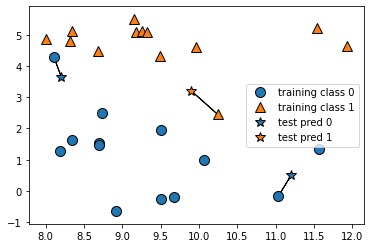

In [1]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1)

In the tarining dataset we have two classes: blue circle for class 0 and red triangle for class 1. After building our *k*-NN model, we enter two new data points, namely blue and red stars. For the case of red star, our model try to find the nearest neighor which is represented by a red triangle, so the new point represented by the red star belongs to class 1. Likewise the point represented by the blue star belongs to class 0. For a more general *k*, one has to look at the *k* closest points and then decide by voting for which class our new data points belong to.

## Application

### Dataset

The dataset we are going to use is the Wisconsin Breast Cancer dataset which is included in the [scikit-learn](https://scikit-learn.org/stable/). Before going into further detail about the dataset, let us first load it.

In [2]:
# load the cancer dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Keys of cancer dataset: {}".format(cancer.keys()))

Keys of cancer dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


Each row of the data records clinical measurements of breast cancer tumors, where each tumor is labeled as *benign* (for harmless tumors) or *malignant* (for cancerous tumors), that is, the name has two classes which can be seen in the key `target_names` which are assigned with label 0 and 1 respectively:

In [3]:
# target names and theri labels of the dataset

print("Target names of the dataset: {}".format(cancer.target_names))
print("Target labels of the dataset: {}".format(cancer.target[: 30]))

Target names of the dataset: ['malignant' 'benign']
Target labels of the dataset: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


So our task is to learn to predict whether a tumor is malignant based on the measurements of the tissue. And we do it by applying *k*-NN model for *k = 5*. But first we look at the shape of the data.

In [4]:
# shape of the data and first 2 rows

print("Shape of the dataset: {}".format(cancer.data.shape))
print("Shape of the target set: {}".format(cancer.target.shape))

cancer.data[ : 2]

Shape of the dataset: (569, 30)
Shape of the target set: (569,)


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

So there are 569 rows and 30 columns. On the other hand, the target set is just a vector containing only zeros and ones. Also, there are 212 rows labelled as 0 (that is there 212 *malignant* counts) and 357 labelled as 1 (that is *bengin*).

In [5]:
# print the class count of both classes
import numpy as np

print("Counts per class: {}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Counts per class: {'malignant': 212, 'benign': 357}


We can also see the names of the columns.

In [6]:
# names of the columns

print("Columns names: \n{}".format(cancer.feature_names))

Columns names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Let us draw the scatter plot of the first two columns in order to see the distribution of both the tumors. Although by looking at only two columns will not provide us sufficient information about the distribution of both the tumors, but still this can give us some clue about how useful is *k*-NN model.

Text(0, 0.5, 'mean texture')

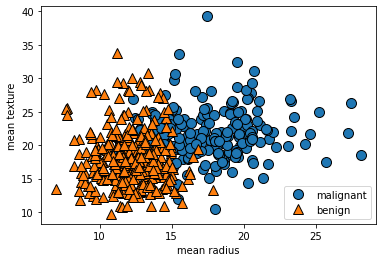

In [7]:
# draw the scatter plot of first two features
import matplotlib.pyplot as plt

mglearn.discrete_scatter(cancer.data[:, 0], cancer.data[:, 1], cancer.target)
plt.legend(["malignant", "benign"], loc=4)
plt.xlabel("mean radius")
plt.ylabel("mean texture")

### Training and testing data

In order to build a machine learning model, we need data not only to build it but we also need data to check whether we can trust our model. So we need to divide our data into training and testing of our *k*-NN model. Python's package `scikit-learn` contains a function that shuffles the dataset and splits it for you: the `train_test_split` function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set.

Futher, as there are 212 rows corresponding to label 0 which are about 37% of the whole data, so we need to include the `stratify` attribute in the `train_test_split` function which will push about 37% of the data corresponding to label 0 into training and also 37% in the testing data. Including `random_state` into our function makes sure that our splitting outcome will remain same even when we restart the kernel and run all the cells again.

In [8]:
# train_test_split of our data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=60)

print("Training data shape: {}".format(X_train.shape))
print("Training features' shape: {}".format(y_train.shape))
print("Testing data shape: {}".format(X_test.shape))
print("Testing features' shape: {}".format(y_test.shape))

print("The percentage of rows corresponding to label 0 inside training data: {}".format(len(y_train[y_train == 0]) / 426 * 100))

Training data shape: (426, 30)
Training features' shape: (426,)
Testing data shape: (143, 30)
Testing features' shape: (143,)
The percentage of rows corresponding to label 0 inside training data: 37.32394366197183


### Builing our model *k*_NN model

The *k*-NN classification algorithm is implemented in the `KNeighborsClassifier` class in the `neighbors` module of `scikit-learn`. In order to specify *k = 5*, we bring its parameter `n_neighbors`.

In [9]:
# implementation
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

To build the model on the training set, we call the `fit` method of the knn object, which takes as arguments the `NumPy` array X_train containing the training data and the `NumPy` array y_train of the corresponding training labels:

In [10]:
# fitting the model

knn.fit(X_train, y_train)

KNeighborsClassifier()

### Prediction

Since our model has been trained now, let us see how it behaves on the testing data. For this, we will bring the `predict` method of the object knn. Also, let us see how different it is from the original testing features y_test.

In [11]:
# prediction for the testing data

y_predict = knn.predict(X_test)
print("Element wise comparison of the predicting and testing features: {}".format(y_test == y_predict))

Element wise comparison of the predicting and testing features: [ True  True  True False  True False  True  True  True False  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True]


We can see the there are several `False` in the above array. This means that our algorithm is not 100% accurate (and in practice there won't be any algorithm which is 100% accurate). In any case, we can see the accuracy score of our model on the training and testing data.

In [12]:
# Accuracy score

print("Train set accuracy score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set accuracy score: {:.2f}".format(knn.score(X_test, y_test)))

Train set accuracy score: 0.95
Test set accuracy score: 0.92


Let us define two new data points and then see whether they belong to *malignant* or *benign*. Recall that *malignant* corresponds to 0 which is the harmful tumor, whereas *benign* corresponds to 1 which is harmless.

In [13]:
# first random data point
X1_new = np.random.uniform(0, 20, 30)
X11_new = X1_new[np.newaxis, :]

# second random data point
X2_new = np.random.uniform(300, 1000, 30)
X21_new = X2_new[np.newaxis, :]

print("Prediction for firstd data point: {}".format(knn.predict(X11_new)))
print("Prediction for firstd data point: {}".format(knn.predict(X21_new)))

Prediction for firstd data point: [1]
Prediction for firstd data point: [0]


### Accuracy of the model

Let us now evaluate training and test set performance with different number of neighbors from 1 to 10.

In [14]:
# empty training and testing scores' set
train_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n in neighbors_settings:
    # build the model
    knn1 = KNeighborsClassifier(n_neighbors=n)
    knn1.fit(X_train, y_train)
    # train accuracy set
    train_accuracy.append(knn1.score(X_train, y_train))
    # test accuracy set
    test_accuracy.append(knn1.score(X_test, y_test))
    
print("Training accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Training accuracy: [1.0, 0.9671361502347418, 0.960093896713615, 0.9577464788732394, 0.9483568075117371, 0.9436619718309859, 0.9460093896713615, 0.9436619718309859, 0.9413145539906104, 0.9413145539906104]
Test accuracy: [0.9090909090909091, 0.8951048951048951, 0.9300699300699301, 0.9090909090909091, 0.9230769230769231, 0.9230769230769231, 0.9090909090909091, 0.9020979020979021, 0.9090909090909091, 0.9020979020979021]


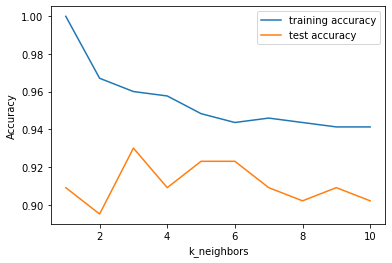

In [15]:
# plot the accuracy different n_neighbors

plt.plot(neighbors_settings, train_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k_neighbors")
plt.legend()

The above graph tells us the training and testing accuracy on the y-axis, whereas the x-axis corresponds to number of *k*-neighbors. Considering a *one* nearest neighbor, the prediction on the training set is perfect. On the other hand the test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere in the middle, using around six neighbors where the train and test accuracy are very close to each other. The worst performance is around 89% accuracy, which might still be acceptable in real World applications.

**Final Note:** For more reading on *k*-Nearest Neighbors Algorithm, we recommend the beautiful book of A. C. Müller and S. Guido: [
Introduction to Machine Learning with Python: A Guide for Data](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/).